# Tax Day Strategy

In [2]:
import pandas as pd
import sys

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
sys.setrecursionlimit(100_000)

import constants
import utils


C:\Users\tomw1\AppData\Local\Temp\ipykernel_6132\1242393096.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
constants.SPLIT

False

In [4]:
constants.START

{'day': 1, 'month': 3}

In [5]:
constants.END

{'day': 30, 'month': 4}

## Rules

1. Buy at the close of the last trading day in March;
2. Sell at the close on the first trading day after calendar day 15 in April.

In [6]:
TICKERS = [
    'XLC', 
    'XLY', 
    'XLP', 
    'XLE', 
    'XLF', 
    'XLV', 
    'XLI', 
    'XLB', 
    'XLRE', 
    'XLK', 
    'XLU', 
    'SPY',
]

# Run Strategy for Individual Ticker

In [40]:
TICKER = "XLY"

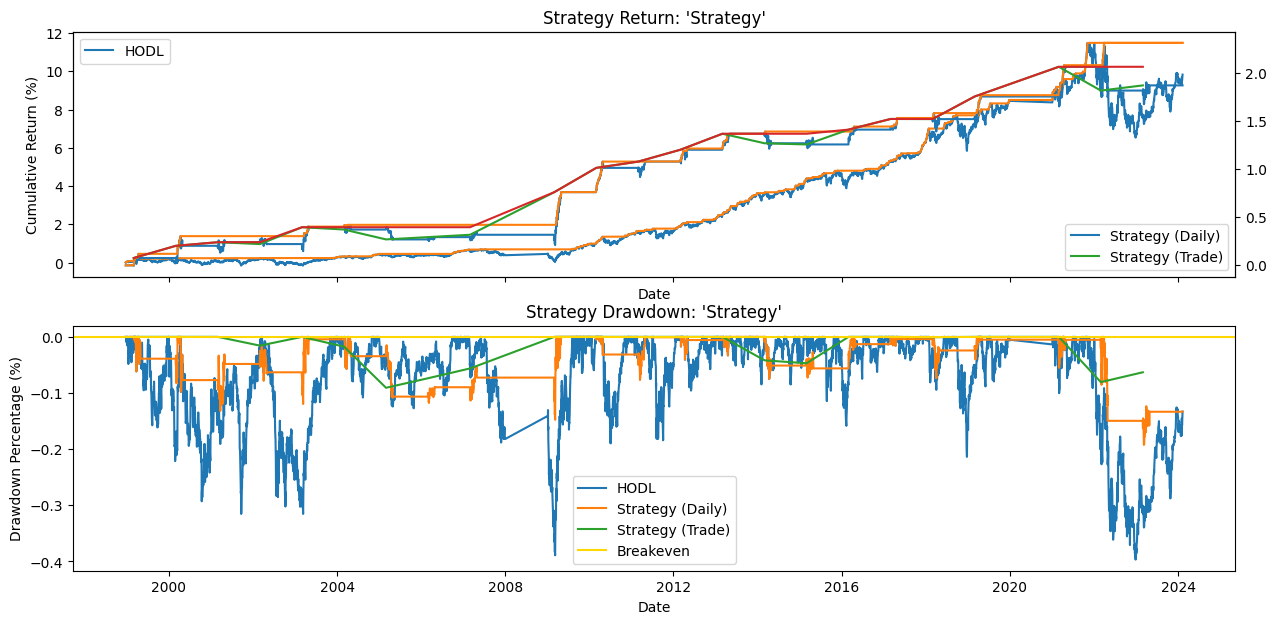

,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLY,XLY,XLY
Start,1998-12-22,1998-12-22,1999-03-01
End,2024-02-09,2024-02-09,2023-03-01
Mean Return,0.04952%,0.11682%,5.01806%
Total Return,983.05%,186.72%,186.72%
Median Return,0.09053%,0.12651%,3.23741%
1st Quartile,-0.59389%,-0.56338%,-0.53585%
3rd Quartile,0.73150%,0.79569%,9.31833%
Std Dev Return,1.30828%,1.36525%,8.79442%
CAGR,4.096 bps,10.754 bps,468.613 bps


In [41]:
strategy_statistics = utils.run(ticker=TICKER, split=constants.SPLIT, do_plot=True)
strategy_statistics

In [42]:
utils.get_statistic(stat_df=strategy_statistics, stat="Total Return")

,HODL,Strategy (Daily),Strategy (Trade)
Total Return,983.05%,186.72%,186.72%


In [43]:
details = utils.get_strategy_returns(ticker=TICKER)
details.keys()

dict_keys(['returns', 'pos', 'trade_returns', 'hodl'])

In [44]:
returns = details["returns"].copy()
positions = details["pos"].copy()
hodl_returns = details["hodl"].copy()


In [45]:
def earlier_positions(pos: pd.Series, n: int = 1) -> pd.Series:
    return ((positions.shift(-n) + positions) > 0).astype(int)

def later_positions(pos: pd.Series, n: int = 1) -> pd.Series:
    return earlier_positions(pos=pos, n=-n)

In [46]:
def earlier_returns(hodl: pd.Series, pos: pd.Series, ticker: str, n: int = 1) -> pd.Series:
    new_pos = earlier_positions(pos=pos, n=n)
    new_rets = new_pos * hodl
    return utils.describe(returns=new_rets, pos=new_pos, daily=True, asset=ticker)

def later_returns(hodl: pd.Series, pos: pd.Series, ticker: str, n: int = 1) -> pd.Series:
    new_pos = later_positions(pos=pos, n=n)
    new_rets = new_pos * hodl
    return utils.describe(returns=new_rets, pos=new_pos, daily=True, asset=ticker)


In [55]:
df_earlier = pd.concat([earlier_returns(hodl=hodl_returns, pos=positions, ticker=TICKER, n=n) for n in range(0, 100)], axis=1)
df_later = pd.concat([later_returns(hodl=hodl_returns, pos=positions, ticker=TICKER, n=n) for n in range(1, 100)], axis=1)

In [56]:
statistic = "Trade CAGR"

df_mean = pd.concat([
    pd.Series(df_later.loc[statistic].str.split("%", expand=True)[0].astype(float).values, index=[*range(1, df_later.shape[1]+1, 1)]),
    pd.Series(df_earlier.loc[statistic].str.split("%", expand=True)[0].astype(float).values, index=[*range(0, -df_earlier.shape[1], -1)]),
], axis=0).sort_index()

In [57]:
import matplotlib.pyplot as plt

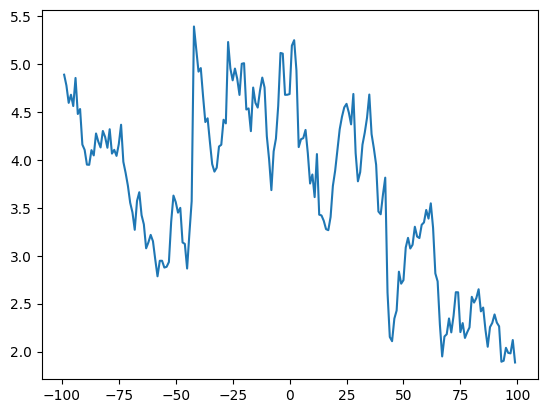

In [58]:
fig, ax = plt.subplots()
ax.plot(df_mean)
plt.show()

# Run Strategy for ALL Tickers Individually

## Calculate Returns

In [7]:
strategy_details = dict()
for ticker in TICKERS:
    print(ticker, end="...")
    details = utils.get_strategy_returns(ticker=ticker)
    strategy_details[ticker] = details
    print("Completed!")

XLC...Completed!
XLY...Completed!
XLP...Completed!
XLE...Completed!
XLF...Completed!
XLV...Completed!
XLI...Completed!
XLB...Completed!
XLRE...Completed!
XLK...Completed!
XLU...Completed!
SPY...Completed!


## Plot Returns for HODL, Strategy (Daily Returns) and Strategy (Trade Returns)

ticker = 'XLC'


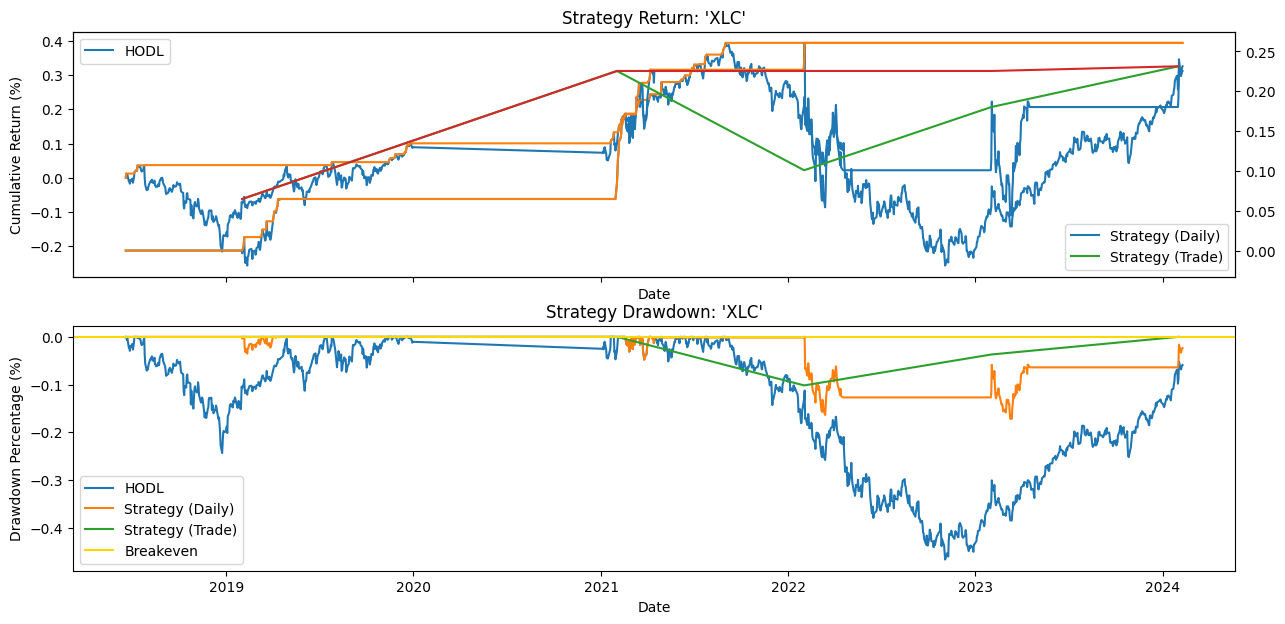


ticker = 'XLY'


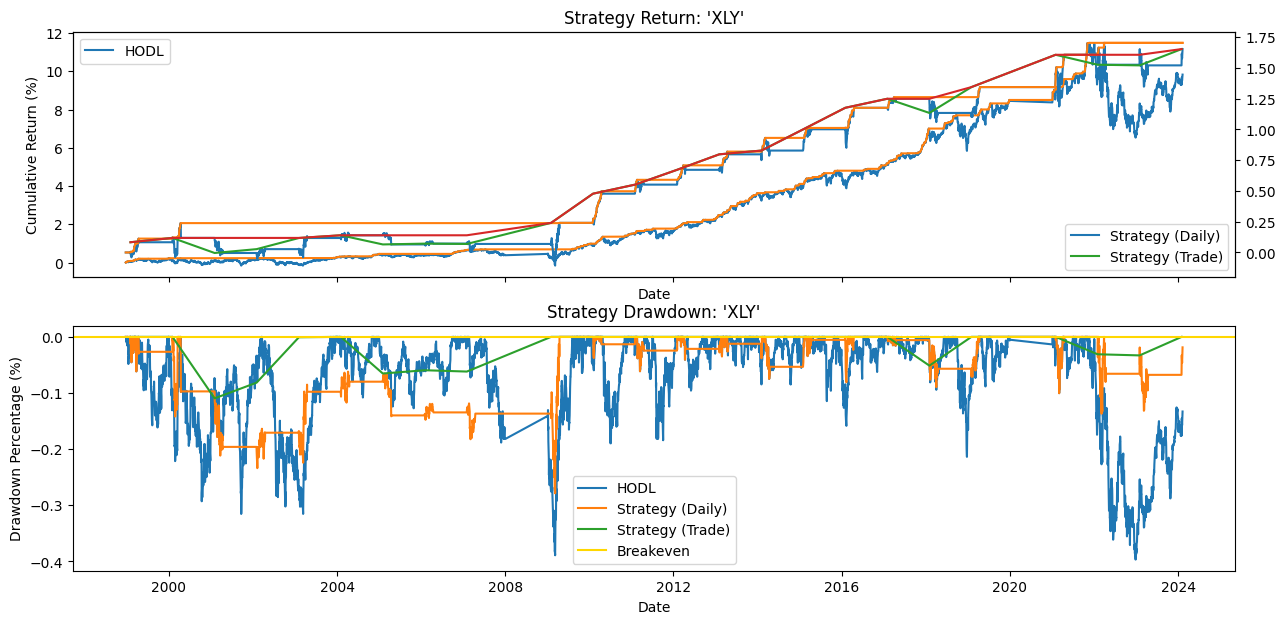


ticker = 'XLP'


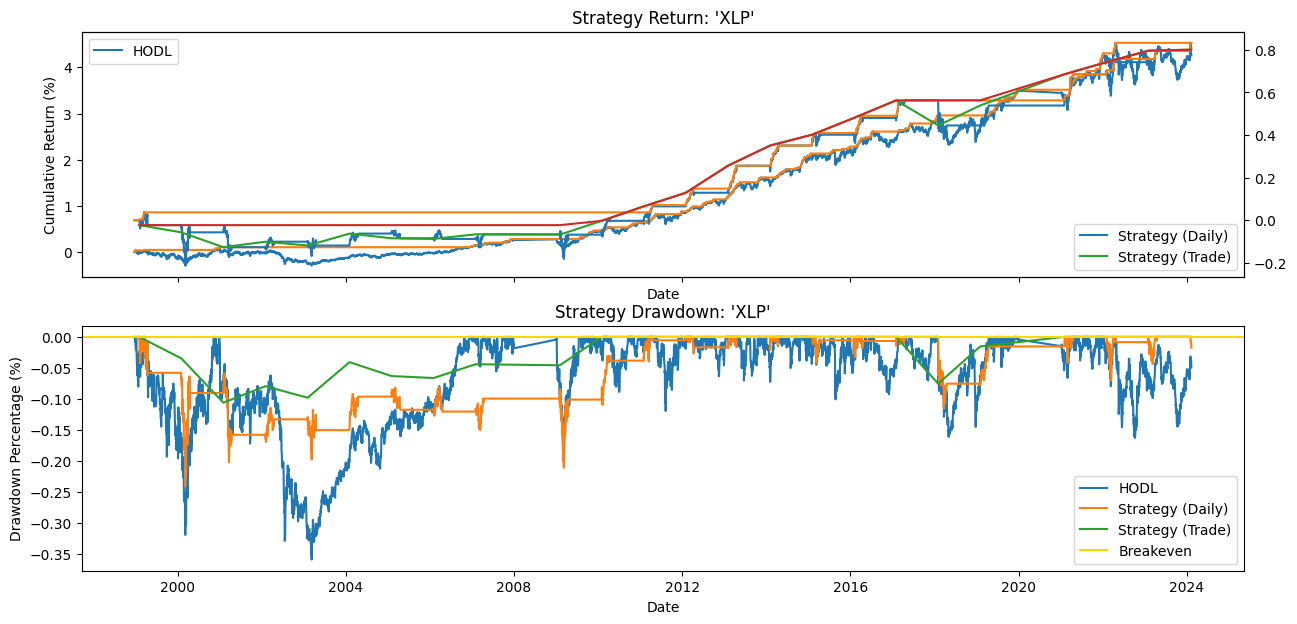


ticker = 'XLE'


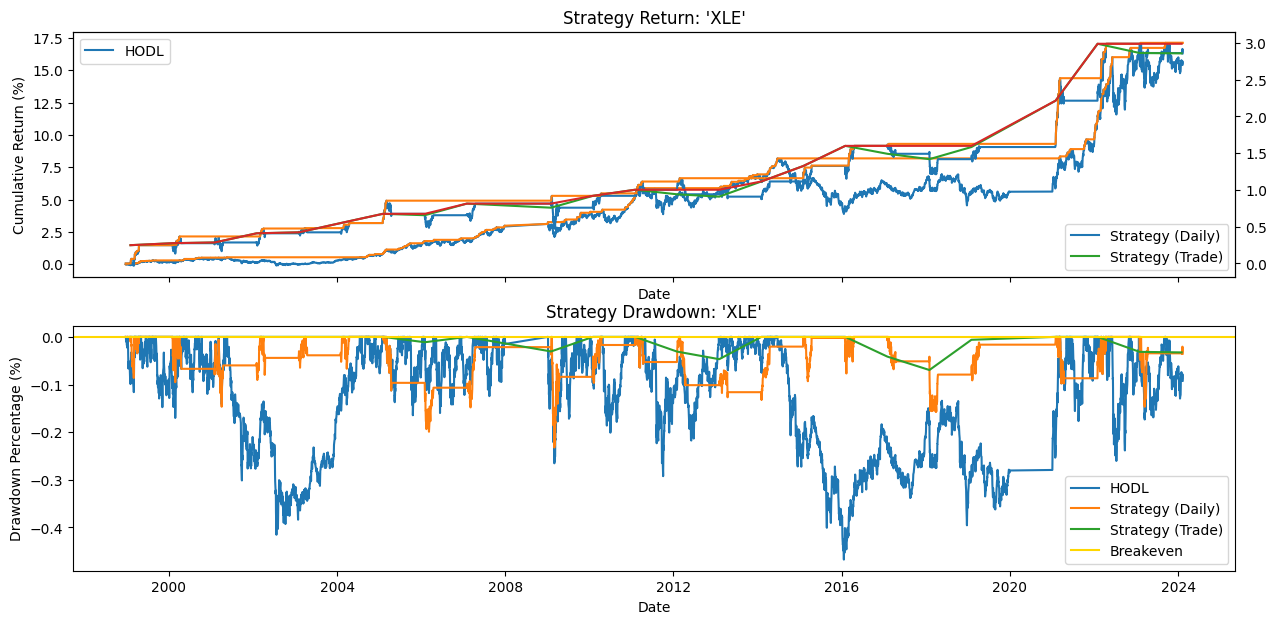


ticker = 'XLF'


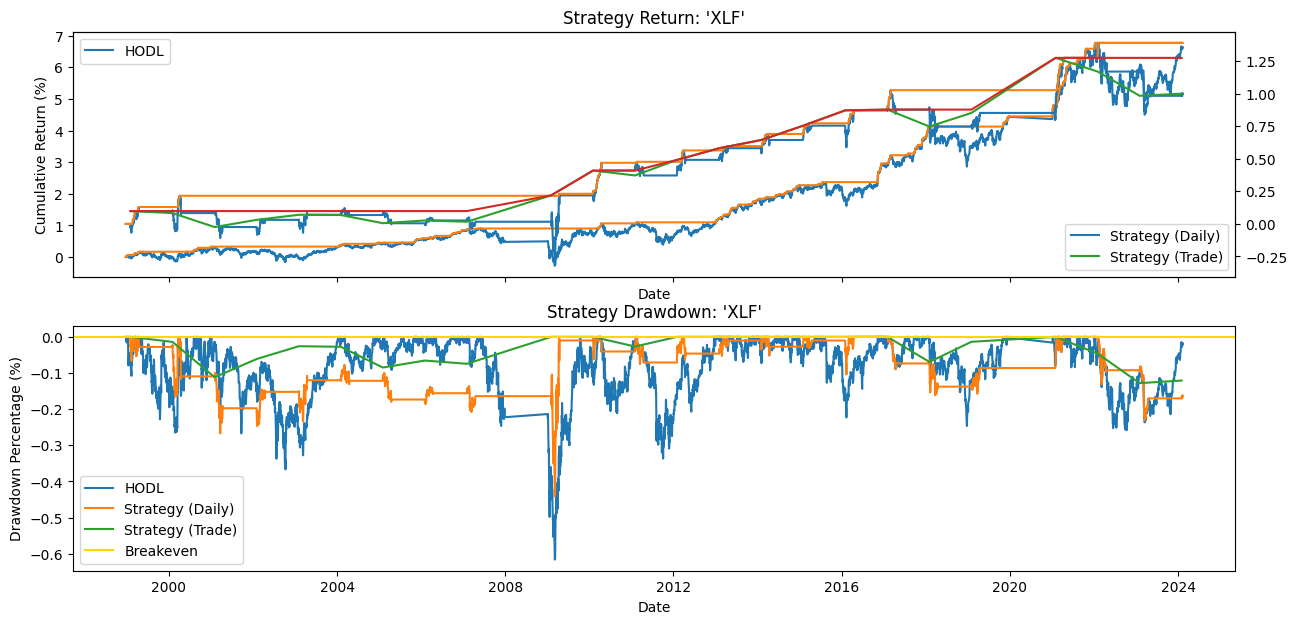


ticker = 'XLV'


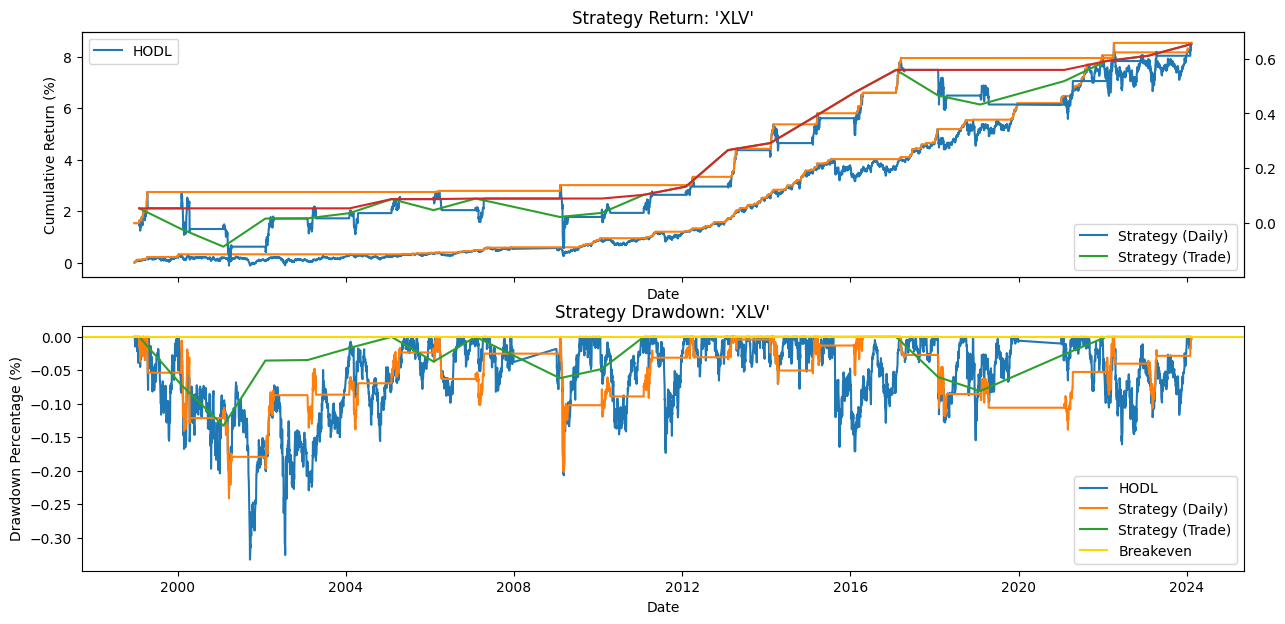


ticker = 'XLI'


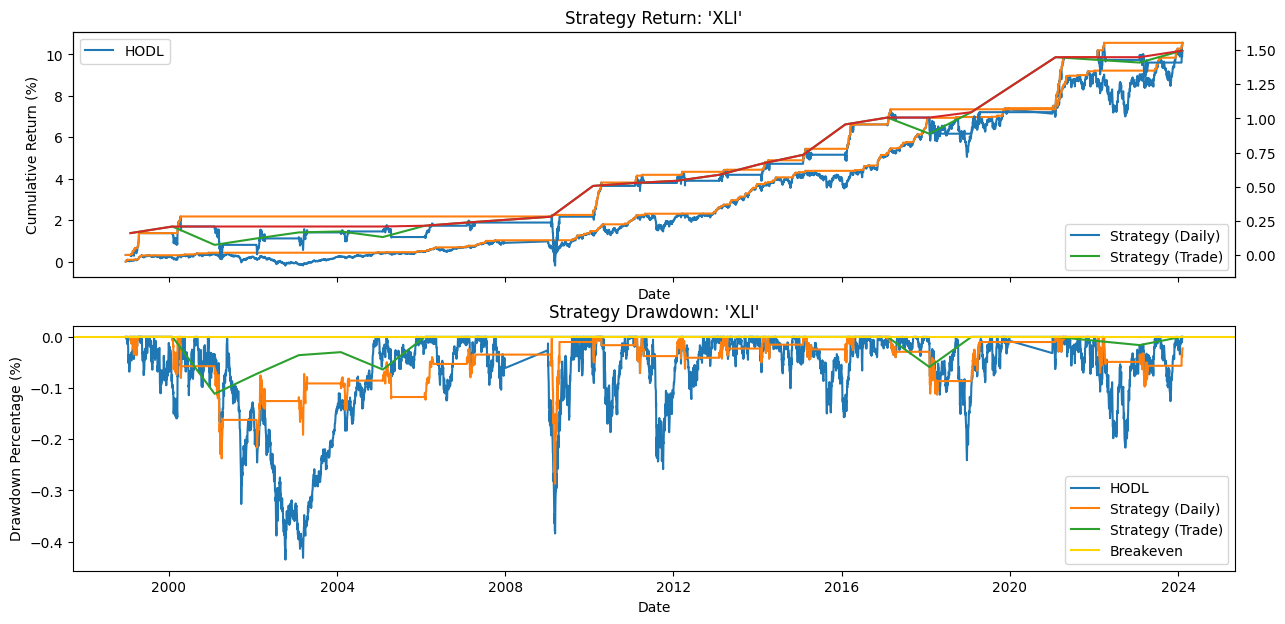


ticker = 'XLB'


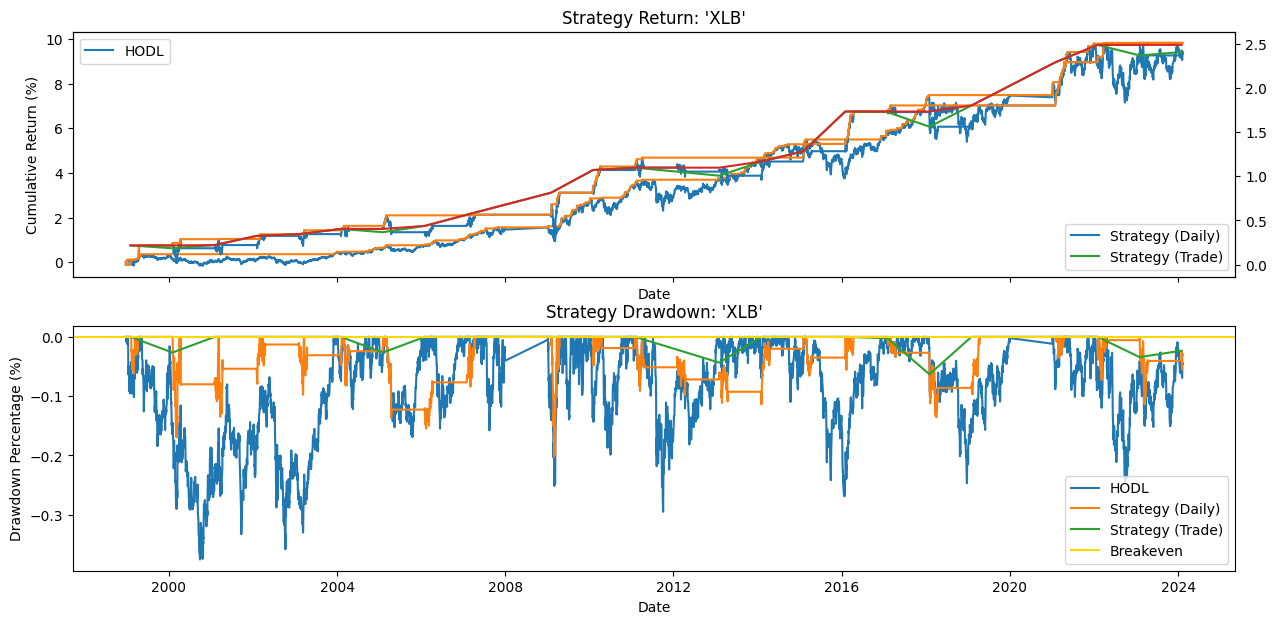


ticker = 'XLRE'


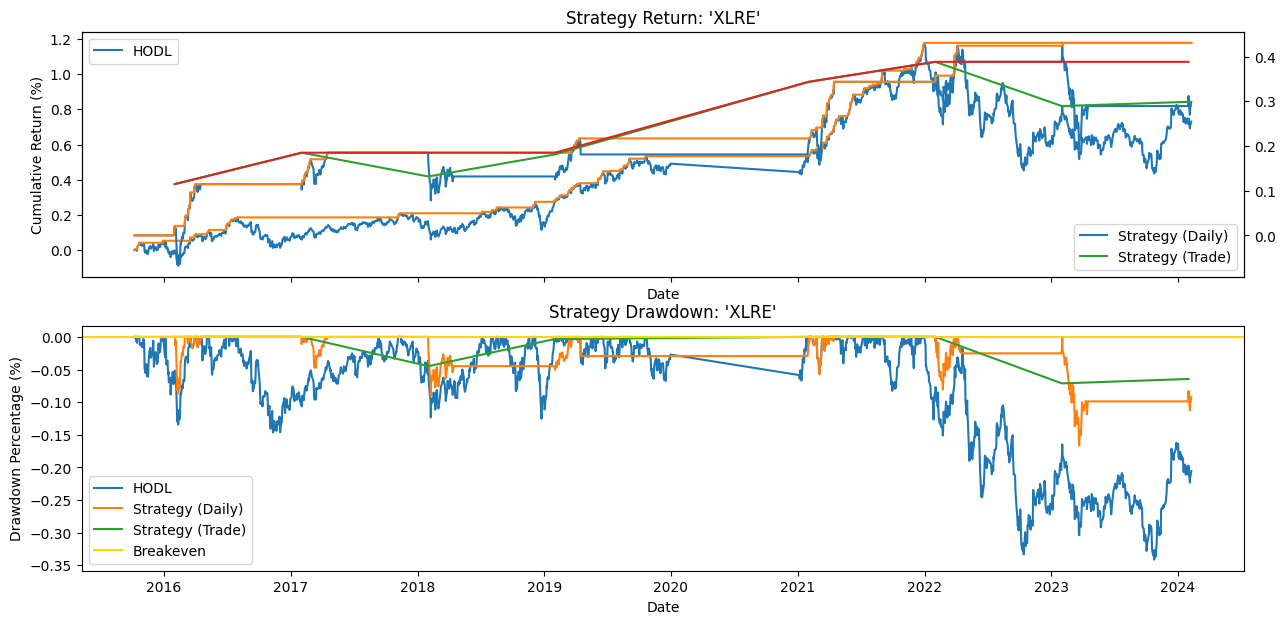


ticker = 'XLK'


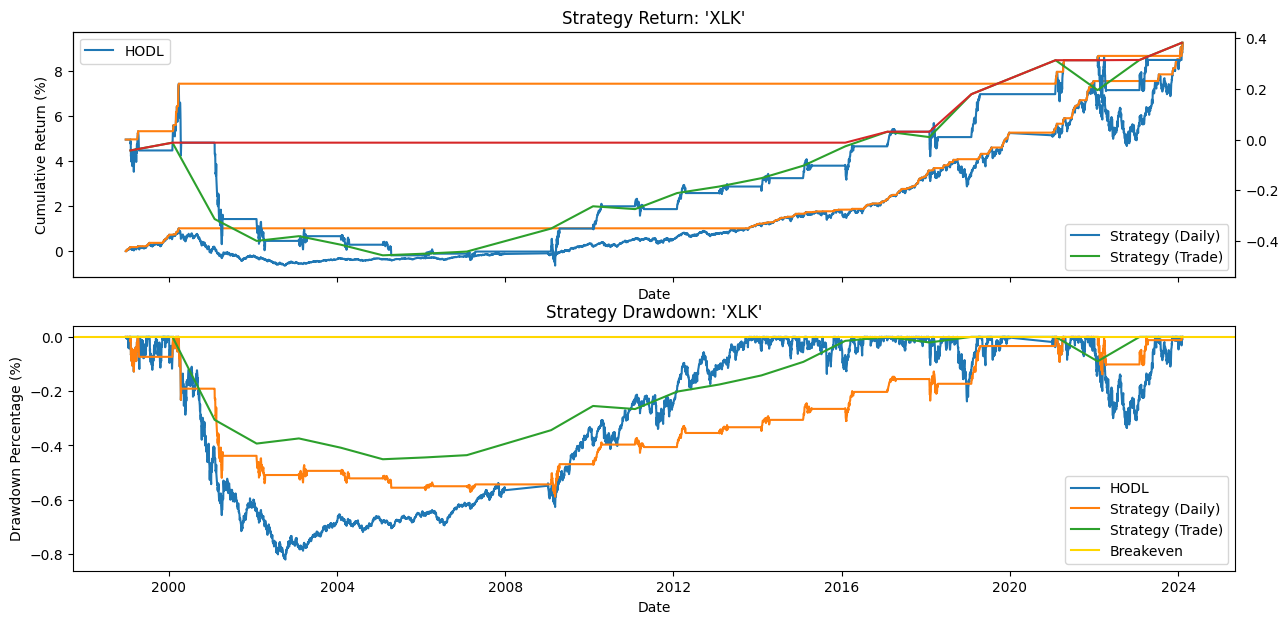


ticker = 'XLU'


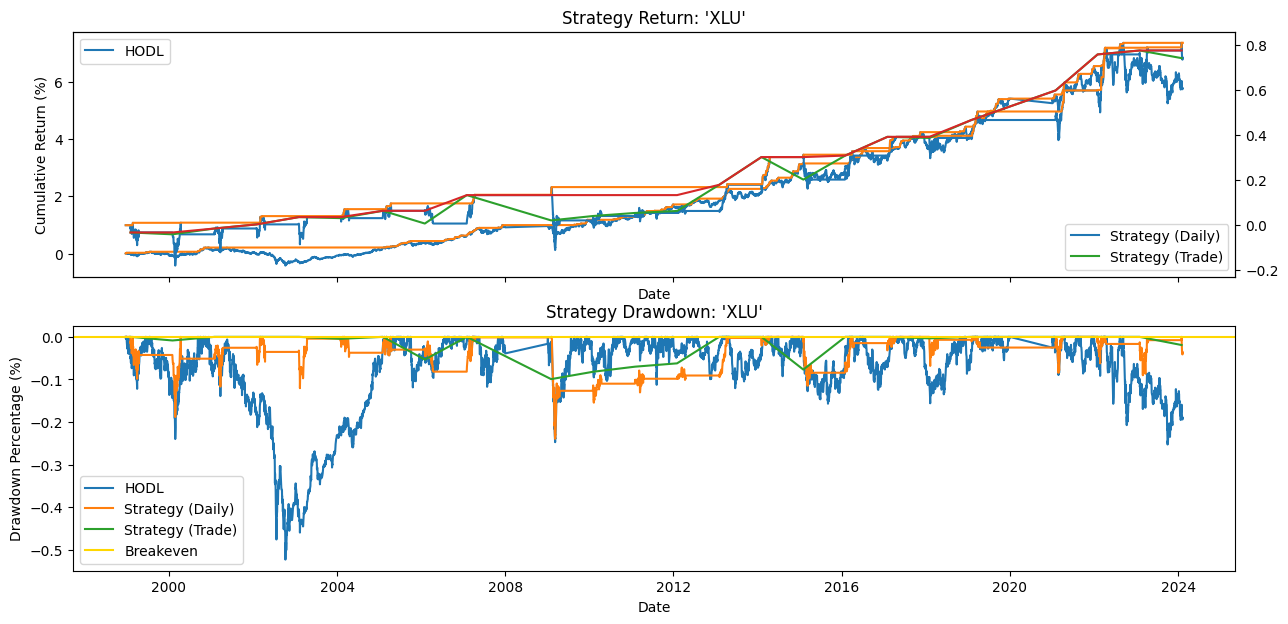


ticker = 'SPY'


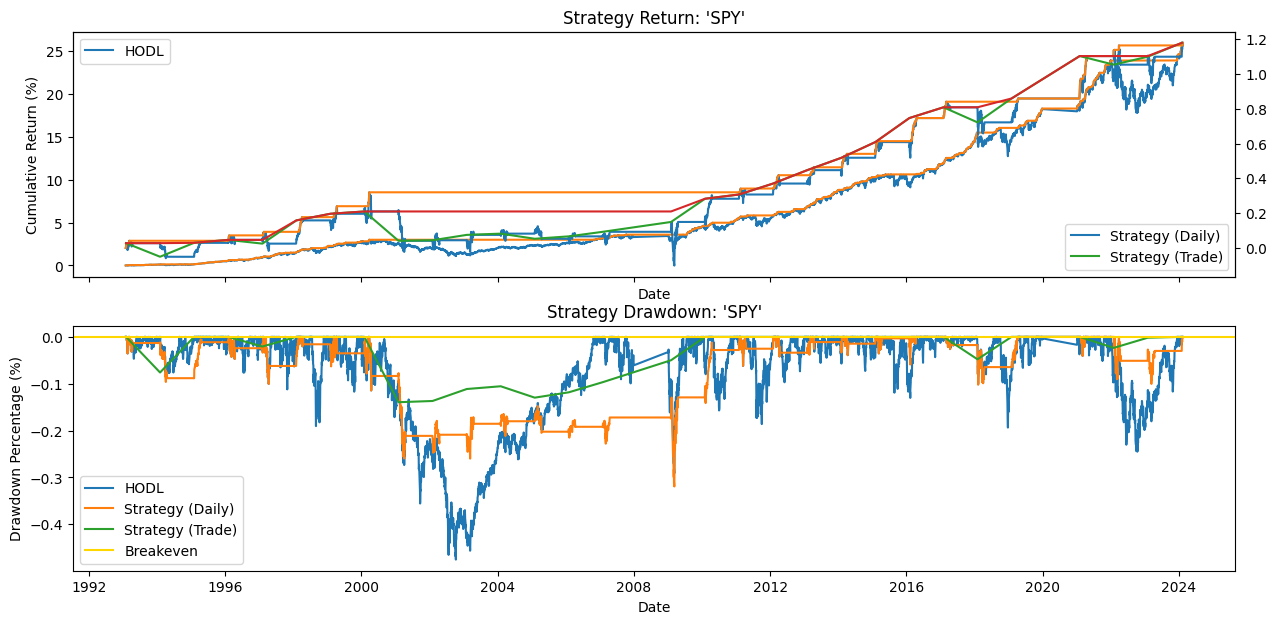

In [8]:
for ticker, details in strategy_details.items():
    print(f"{ticker = !r}")
    utils.plot(asset=ticker, **{"HODL": details["hodl"], "Strategy (Daily)": details["returns"], "Strategy (Trade)": details["trade_returns"]})
    print()

## Describe Returns for HODL, Strategy (Daily Returns) and Strategy (Trade Returns)

In [9]:
descriptions = dict()
for ticker, details in strategy_details.items():
    print(f"{ticker = !r}")
    try:
        description = utils.run(ticker=ticker, split=constants.SPLIT, details=details, do_plot=False)
        display(description)
        descriptions[ticker] = description
    except Exception as e:
        print(f"Exception Raised Running: {e}")
    print("=========================================================================")

all_stock_descriptions = utils.combine_descriptions(**descriptions)

ticker = 'XLC'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLC,XLC,XLC
Start,2018-06-19,2018-06-19,2019-02-01
End,2024-02-09,2024-02-09,2024-02-01
Mean Return,0.03257%,0.10573%,4.58872%
Total Return,31.18%,23.14%,23.14%
Median Return,0.06840%,0.10856%,6.47406%
1st Quartile,-0.69773%,-0.77322%,-2.91768%
3rd Quartile,0.76880%,0.90700%,11.15245%
Std Dev Return,1.36623%,1.40163%,9.20231%
CAGR,2.324 bps,9.595 bps,425.018 bps


ticker = 'XLY'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLY,XLY,XLY
Start,1998-12-22,1998-12-22,1999-02-01
End,2024-02-09,2024-02-09,2024-02-01
Mean Return,0.04952%,0.08991%,4.37121%
Total Return,983.05%,165.26%,165.26%
Median Return,0.09052%,0.12673%,4.18089%
1st Quartile,-0.59381%,-0.55427%,0.20754%
3rd Quartile,0.73150%,0.76633%,8.75663%
Std Dev Return,1.30828%,1.36184%,6.93056%
CAGR,4.096 bps,8.066 bps,414.855 bps


ticker = 'XLP'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLP,XLP,XLP
Start,1998-12-22,1998-12-22,1999-02-01
End,2024-02-09,2024-02-09,2024-02-01
Mean Return,0.03250%,0.05310%,2.60039%
Total Return,425.99%,80.10%,80.10%
Median Return,0.04668%,0.08187%,3.24303%
1st Quartile,-0.42941%,-0.40810%,-1.17194%
3rd Quartile,0.51487%,0.54535%,6.41655%
Std Dev Return,0.89049%,0.94555%,5.00193%
CAGR,2.854 bps,4.863 bps,248.169 bps


ticker = 'XLE'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLE,XLE,XLE
Start,1998-12-22,1998-12-22,1999-02-01
End,2024-02-09,2024-02-09,2024-02-01
Mean Return,0.06010%,0.12354%,6.12406%
Total Return,"1,543.98%",285.75%,285.75%
Median Return,0.07337%,0.11710%,5.56066%
1st Quartile,-0.79879%,-0.76539%,-1.38629%
3rd Quartile,0.95421%,1.02687%,9.82175%
Std Dev Return,1.54632%,1.54418%,8.82511%
CAGR,4.813 bps,11.163 bps,578.630 bps


ticker = 'XLF'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLF,XLF,XLF
Start,1998-12-22,1998-12-22,1999-02-01
End,2024-02-09,2024-02-09,2024-02-01
Mean Return,0.04704%,0.07419%,3.24521%
Total Return,663.15%,100.03%,100.03%
Median Return,0.05816%,0.08377%,2.94454%
1st Quartile,-0.65269%,-0.63105%,-2.03692%
3rd Quartile,0.75785%,0.81245%,6.69263%
Std Dev Return,1.55913%,1.85096%,8.33270%
CAGR,3.494 bps,5.732 bps,293.094 bps


ticker = 'XLV'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLV,XLV,XLV
Start,1998-12-22,1998-12-22,1999-02-01
End,2024-02-09,2024-02-09,2024-02-01
Mean Return,0.04422%,0.04721%,2.24886%
Total Return,851.04%,65.24%,65.24%
Median Return,0.06342%,0.04393%,2.65420%
1st Quartile,-0.49768%,-0.51438%,-1.07419%
3rd Quartile,0.62101%,0.68005%,5.82239%
Std Dev Return,1.04879%,1.06622%,5.31838%
CAGR,3.872 bps,4.152 bps,211.468 bps


ticker = 'XLI'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLI,XLI,XLI
Start,1998-12-22,1998-12-22,1999-02-01
End,2024-02-09,2024-02-09,2024-02-01
Mean Return,0.04935%,0.08357%,4.11088%
Total Return,"1,055.82%",149.56%,149.56%
Median Return,0.08610%,0.11902%,3.52968%
1st Quartile,-0.55349%,-0.50021%,0.82810%
3rd Quartile,0.68385%,0.74267%,6.19658%
Std Dev Return,1.20582%,1.26195%,7.06288%
CAGR,4.207 bps,7.561 bps,388.413 bps


ticker = 'XLB'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLB,XLB,XLB
Start,1998-12-22,1998-12-22,1999-02-01
End,2024-02-09,2024-02-09,2024-02-01
Mean Return,0.04946%,0.11112%,5.50888%
Total Return,934.13%,240.73%,240.73%
Median Return,0.07500%,0.11054%,4.80017%
1st Quartile,-0.68594%,-0.63060%,-1.19148%
3rd Quartile,0.81243%,0.88424%,9.11095%
Std Dev Return,1.36368%,1.39758%,7.77381%
CAGR,4.016 bps,10.137 bps,524.067 bps


ticker = 'XLRE'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLRE,XLRE,XLRE
Start,2015-10-08,2015-10-08,2016-02-01
End,2024-02-09,2024-02-09,2024-02-01
Mean Return,0.03567%,0.07599%,3.54128%
Total Return,73.09%,29.88%,29.88%
Median Return,0.09152%,0.09636%,3.84336%
1st Quartile,-0.53095%,-0.49407%,-1.87588%
3rd Quartile,0.65256%,0.64999%,8.88864%
Std Dev Return,1.09007%,1.10164%,7.18673%
CAGR,2.973 bps,6.992 bps,332.170 bps


ticker = 'XLK'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLK,XLK,XLK
Start,1998-12-22,1998-12-22,1999-02-01
End,2024-02-09,2024-02-09,2024-02-01
Mean Return,0.05165%,0.03931%,1.91430%
Total Return,922.78%,38.23%,38.23%
Median Return,0.10012%,0.08767%,3.24579%
1st Quartile,-0.63951%,-0.61411%,-3.17935%
3rd Quartile,0.77779%,0.80514%,8.63487%
Std Dev Return,1.53063%,1.58425%,10.32076%
CAGR,3.997 bps,2.676 bps,135.812 bps


ticker = 'XLU'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLU,XLU,XLU
Start,1998-12-22,1998-12-22,1999-02-01
End,2024-02-09,2024-02-09,2024-02-01
Mean Return,0.03865%,0.05143%,2.50591%
Total Return,576.67%,74.23%,74.23%
Median Return,0.08584%,0.11452%,1.88458%
1st Quartile,-0.52938%,-0.49676%,-0.65135%
3rd Quartile,0.65426%,0.67311%,7.61193%
Std Dev Return,1.07496%,1.05115%,5.92440%
CAGR,3.287 bps,4.590 bps,234.042 bps


ticker = 'SPY'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,SPY,SPY,SPY
Start,1993-01-29,1993-01-29,1993-02-01
End,2024-02-09,2024-02-09,2024-02-01
Mean Return,0.05062%,0.05694%,2.78985%
Total Return,"2,597.71%",117.88%,117.88%
Median Return,0.06694%,0.06963%,2.85857%
1st Quartile,-0.41626%,-0.42561%,0.66012%
3rd Quartile,0.58064%,0.63333%,5.61803%
Std Dev Return,1.05063%,1.07594%,5.75175%
CAGR,4.510 bps,5.115 bps,262.996 bps


## Portfolio Returns

In [10]:
all_hodl_returns = pd.concat([details["hodl"].to_frame(name=ticker) for ticker, details in strategy_details.items()], axis=1)
all_hodl_returns = all_hodl_returns.sort_index()
all_hodl_returns = all_hodl_returns.fillna(0.0)
all_hodl_returns.head(5)

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
Date,,,,,,,,,,,,
1993-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1993-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007113
1993-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002118
1993-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010571
1993-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004184


In [11]:
all_returns = pd.concat([details["returns"].to_frame(name=ticker) for ticker, details in strategy_details.items()], axis=1)
all_returns = all_returns.sort_index()
all_returns = all_returns.fillna(0.0)
all_returns

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
Date,,,,,,,,,,,,
1993-01-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1993-02-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007113
1993-02-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002118
1993-02-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010571
1993-02-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004184
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-05,-0.014046,-0.014099,-0.006202,-0.002514,-0.005900,0.003099,-0.005451,-0.025394,-0.019838,0.002274,-0.020816,-0.003641
2024-02-06,-0.003053,0.006063,0.002306,0.003241,0.002065,0.010883,0.008960,0.017659,0.015180,-0.004588,0.003654,0.002903
2024-02-07,0.005103,0.011201,-0.000947,0.002034,0.007468,0.002709,0.006639,0.008009,-0.000525,0.013233,0.000662,0.008340


In [12]:
all_positions = pd.concat([details["pos"].to_frame(name=ticker) for ticker, details in strategy_details.items()], axis=1)
all_positions = all_positions.sort_index()
all_positions = all_positions.fillna(0.0)
all_positions

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
1993-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1993-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1993-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1993-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1993-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-05,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2024-02-06,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2024-02-07,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2024-02-08,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


### Equal-Weighted

In [13]:
equal_weighted_positions = all_positions.fillna(0.0).div(all_positions.sum(axis=1) + 1e-5, axis=0)
equal_weighted_position_sum = equal_weighted_positions.sum(axis=1)
equal_weighted_positions.head(5)

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
1993-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1993-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99999
1993-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99999
1993-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99999
1993-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99999


In [14]:
equal_weighted_returns = (all_hodl_returns * equal_weighted_positions).sum(axis=1)
equal_weighted_returns.head(5)

Date
1993-01-29    0.000000
1993-02-01    0.007113
1993-02-02    0.002118
1993-02-03    0.010571
1993-02-04    0.004184
dtype: float64

In [15]:
train_dates = utils.get_training(all_hodl_returns.mean(axis=1)).index.tolist()
valid_dates = utils.get_validation(all_hodl_returns.mean(axis=1)).index.tolist()
test_dates = utils.get_test(all_hodl_returns.mean(axis=1)).index.tolist()

if constants.SPLIT:
    equal_weighted_description = pd.concat([
        utils.describe_split(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe_split(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe_split(
            returns=equal_weighted_returns, pos=equal_weighted_position_sum, daily=True, asset="Equally-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Daily)"),
        utils.describe_split(
            returns=utils.get_trade_return(returns=equal_weighted_returns, pos=equal_weighted_position_sum), daily=False, asset="Equally-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)
else:
    equal_weighted_description = pd.concat([
        utils.describe(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe(
            returns=equal_weighted_returns, pos=equal_weighted_position_sum, daily=True, asset="Equally-weighted",
        ).to_frame(name="Strategy (Daily)"),
        utils.describe(
            returns=utils.get_trade_return(returns=equal_weighted_returns, pos=equal_weighted_position_sum), daily=False, asset="Equally-weighted",
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)
    
equal_weighted_description

,HODL,Market,Strategy (Daily),Strategy (Trade)
Asset,Equally-weighted,SPY,Equally-weighted,Equally-weighted
Start,1993-01-29,1993-01-29,1993-01-29,1993-02-01
End,2024-02-09,2024-02-09,2024-02-09,2024-02-01
Mean Return,0.03343%,0.05062%,0.06800%,3.37710%
Total Return,819.44%,"2,597.71%",160.61%,160.61%
Median Return,0.02287%,0.06694%,0.10207%,2.98877%
1st Quartile,-0.23802%,-0.41626%,-0.40377%,0.75456%
3rd Quartile,0.35162%,0.58064%,0.60274%,6.07036%
Std Dev Return,0.78344%,1.05063%,1.00922%,5.30876%
CAGR,3.036 bps,4.510 bps,6.291 bps,324.435 bps


In [16]:
utils.get_statistic(stat_df=equal_weighted_description, stat="Total Return")

,HODL,Market,Strategy (Daily),Strategy (Trade)
Total Return,819.44%,"2,597.71%",160.61%,160.61%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


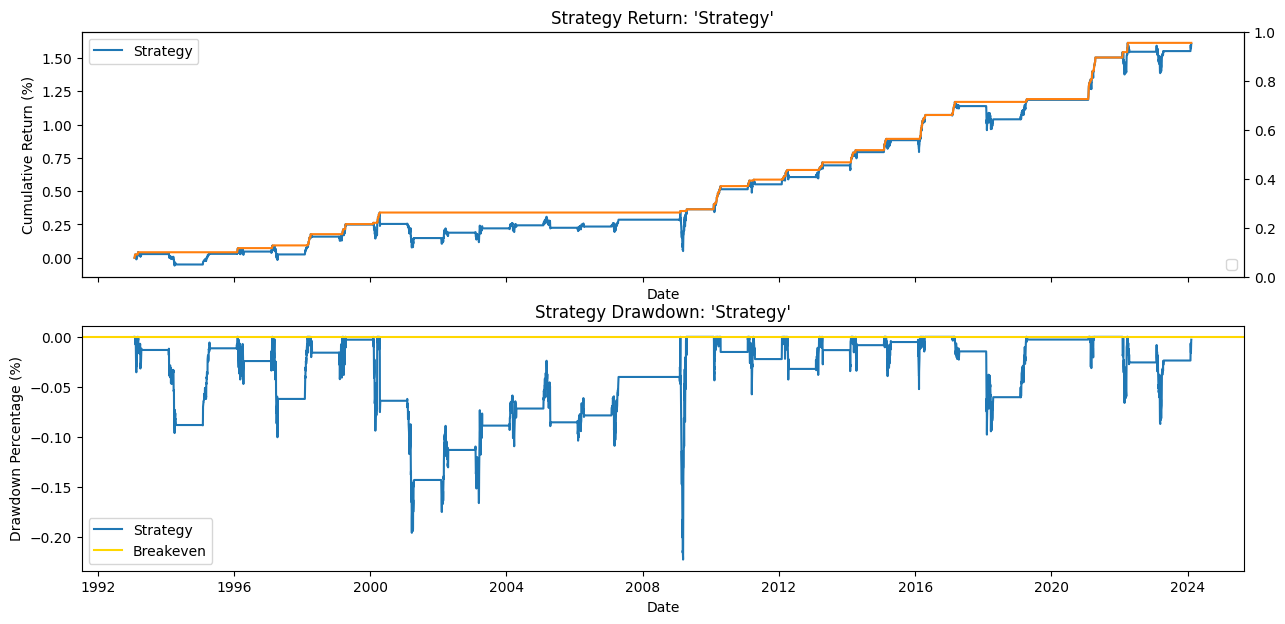

In [17]:
utils.plot(rets=equal_weighted_returns)

### Risk-Weighted

In [18]:
years = [year for year in range(all_returns.index[0].year, all_returns.index[-1].year)]

In [19]:
risk_weighted_positions = []

for i, year in enumerate(years):

    if i == 0:
        weights = all_positions.loc[all_positions.index.year == year].fillna(0.0).div(all_positions.loc[all_positions.index.year == year].sum(axis=1) + 1e-5, axis=0)
    else:
        positions_prev_years = all_positions.loc[all_positions.index.year < year]
        active_positions_prev_years = positions_prev_years.loc[positions_prev_years.sum(axis=1) != 0.0]
        active_tickers_prev_years = active_positions_prev_years.loc[:, active_positions_prev_years.sum(axis=0) != 0]
        strategy_returns_by_ticker_prev_years = all_returns.reindex(index=active_tickers_prev_years.index, columns=active_tickers_prev_years.columns)
        weights_by_ticker = (strategy_returns_by_ticker_prev_years.std() / strategy_returns_by_ticker_prev_years.std().sum()).to_dict()

        positions_this_year = all_positions.loc[all_positions.index.year == year]
        active_positions_this_year = positions_this_year.loc[positions_this_year.sum(axis=1) != 0.0]

        weights = pd.DataFrame(weights_by_ticker, index=active_positions_this_year.index)
        weights = weights.reindex(index=positions_this_year.index, columns=positions_this_year.columns, fill_value=0.0)
    
    risk_weighted_positions.append(weights)

risk_weighted_positions = pd.concat(risk_weighted_positions, axis=0)
risk_weighted_positions = risk_weighted_positions.reindex(index=all_hodl_returns.index).ffill()
risk_weighted_positions_sum = risk_weighted_positions.sum(axis=1)
risk_weighted_positions.head(5)

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
Date,,,,,,,,,,,,
1993-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1993-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99999
1993-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99999
1993-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99999
1993-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99999


In [20]:
risk_weighted_returns = (all_hodl_returns * risk_weighted_positions).sum(axis=1)
risk_weighted_returns.head(5)

Date
1993-01-29    0.000000
1993-02-01    0.007113
1993-02-02    0.002118
1993-02-03    0.010571
1993-02-04    0.004184
dtype: float64

In [21]:
train_dates = utils.get_training(all_hodl_returns.mean(axis=1)).index.tolist()
valid_dates = utils.get_validation(all_hodl_returns.mean(axis=1)).index.tolist()
test_dates = utils.get_test(all_hodl_returns.mean(axis=1)).index.tolist()

if constants.SPLIT:
    risk_weighted_description = pd.concat([
        utils.describe_split(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe_split(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe_split(
            returns=risk_weighted_returns, pos=risk_weighted_positions_sum, daily=True, asset="Risk-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Daily)"),
        utils.describe_split(
            returns=utils.get_trade_return(returns=risk_weighted_returns, pos=risk_weighted_positions_sum), daily=False, asset="Equally-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)
else:
    risk_weighted_description = pd.concat([
        utils.describe(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe(
            returns=risk_weighted_returns, pos=risk_weighted_positions_sum, daily=True, asset="Risk-weighted",
        ).to_frame(name="Strategy (Daily)"),
        utils.describe(
            returns=utils.get_trade_return(returns=risk_weighted_returns, pos=risk_weighted_positions_sum), daily=False, asset="Equally-weighted",
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)

risk_weighted_description

,HODL,Market,Strategy (Daily),Strategy (Trade)
Asset,Equally-weighted,SPY,Risk-weighted,Equally-weighted
Start,1993-01-29,1993-01-29,1993-01-29,1993-02-01
End,2024-02-09,2024-02-09,2024-02-09,2023-02-01
Mean Return,0.03343%,0.05062%,0.06442%,3.27530%
Total Return,819.44%,"2,597.71%",144.49%,144.49%
Median Return,0.02287%,0.06694%,0.10053%,2.75891%
1st Quartile,-0.23802%,-0.41626%,-0.41260%,0.83226%
3rd Quartile,0.35162%,0.58064%,0.61304%,6.52106%
Std Dev Return,0.78344%,1.05063%,1.04253%,5.54780%
CAGR,3.036 bps,4.510 bps,5.899 bps,313.076 bps


In [22]:
utils.get_statistic(stat_df=risk_weighted_description, stat="Mean Return")

,HODL,Market,Strategy (Daily),Strategy (Trade)
Mean Return,0.03343%,0.05062%,0.06442%,3.27530%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


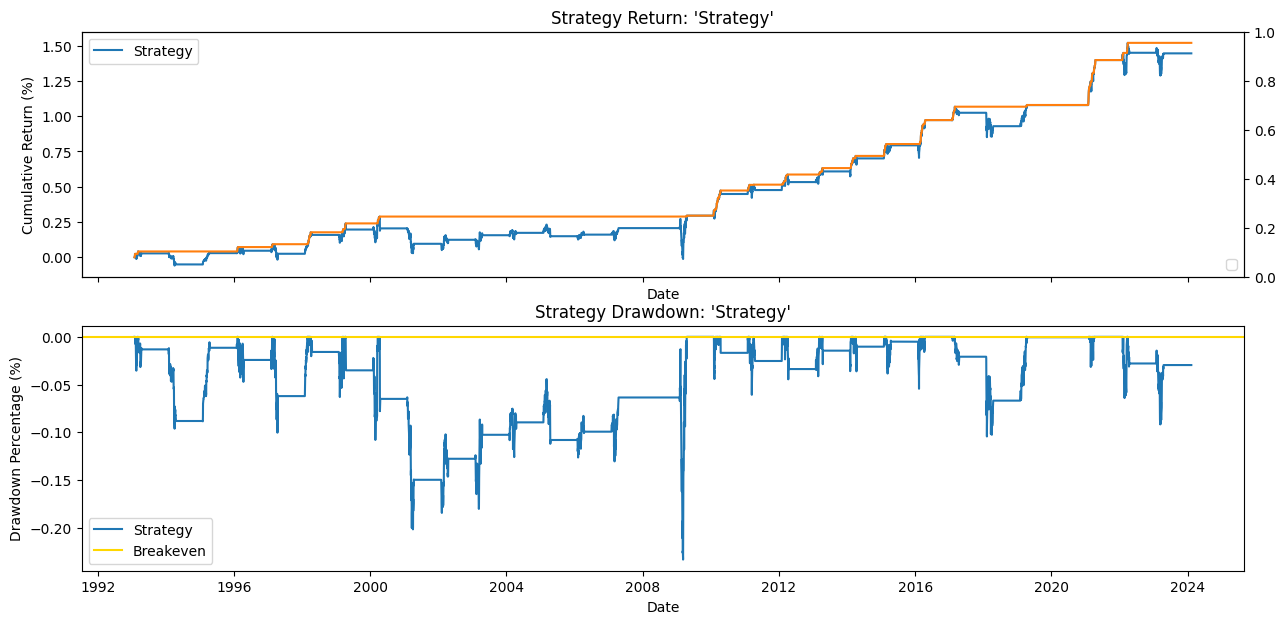

In [23]:
utils.plot(rets=risk_weighted_returns)

### Sharpe-Weighted

In [24]:
years = [year for year in range(all_returns.index[0].year, all_returns.index[-1].year)]

In [25]:
sharpe_weighted_positions = []

for i, year in enumerate(years):

    if i == 0:
        weights = all_positions.loc[all_positions.index.year == year].fillna(0.0).div(all_positions.loc[all_positions.index.year == year].sum(axis=1) + 1e-5, axis=0)
    else:
        positions_prev_years = all_positions.loc[all_positions.index.year < year]
        active_positions_prev_years = positions_prev_years.loc[positions_prev_years.sum(axis=1) != 0.0]
        active_tickers_prev_years = active_positions_prev_years.loc[:, active_positions_prev_years.sum(axis=0) != 0]
        strategy_returns_by_ticker_prev_years = all_returns.reindex(index=active_tickers_prev_years.index, columns=active_tickers_prev_years.columns)
        weights_by_ticker = ((strategy_returns_by_ticker_prev_years.mean() / strategy_returns_by_ticker_prev_years.std()) / (strategy_returns_by_ticker_prev_years.mean() / strategy_returns_by_ticker_prev_years.std()).sum()).to_dict()

        positions_this_year = all_positions.loc[all_positions.index.year == year]
        active_positions_this_year = positions_this_year.loc[positions_this_year.sum(axis=1) != 0.0]

        weights = pd.DataFrame(weights_by_ticker, index=active_positions_this_year.index)
        weights = weights.reindex(index=positions_this_year.index, columns=positions_this_year.columns, fill_value=0.0)
    
    sharpe_weighted_positions.append(weights)

sharpe_weighted_positions = pd.concat(sharpe_weighted_positions, axis=0)
sharpe_weighted_positions = sharpe_weighted_positions.reindex(index=all_hodl_returns.index).ffill()
sharpe_weighted_positions_sum = sharpe_weighted_positions.sum(axis=1)
sharpe_weighted_positions.head(5)

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
Date,,,,,,,,,,,,
1993-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1993-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99999
1993-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99999
1993-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99999
1993-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99999


In [26]:
sharpe_weighted_returns = (all_hodl_returns * sharpe_weighted_positions).sum(axis=1)
sharpe_weighted_returns.head(5)

Date
1993-01-29    0.000000
1993-02-01    0.007113
1993-02-02    0.002118
1993-02-03    0.010571
1993-02-04    0.004184
dtype: float64

In [27]:
train_dates = utils.get_training(all_hodl_returns.mean(axis=1)).index.tolist()
valid_dates = utils.get_validation(all_hodl_returns.mean(axis=1)).index.tolist()
test_dates = utils.get_test(all_hodl_returns.mean(axis=1)).index.tolist()

if constants.SPLIT:
    sharpe_weighted_description = pd.concat([
        utils.describe_split(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe_split(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe_split(
            returns=sharpe_weighted_returns, pos=sharpe_weighted_positions_sum, daily=True, asset="Risk-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Daily)"),
        utils.describe_split(
            returns=utils.get_trade_return(returns=sharpe_weighted_returns, pos=sharpe_weighted_positions_sum), daily=False, asset="Equally-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)
else:
    sharpe_weighted_description = pd.concat([
        utils.describe(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe(
            returns=sharpe_weighted_returns, pos=sharpe_weighted_positions_sum, daily=True, asset="Risk-weighted",
        ).to_frame(name="Strategy (Daily)"),
        utils.describe(
            returns=utils.get_trade_return(returns=sharpe_weighted_returns, pos=sharpe_weighted_positions_sum), daily=False, asset="Equally-weighted",
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)

sharpe_weighted_description

,HODL,Market,Strategy (Daily),Strategy (Trade)
Asset,Equally-weighted,SPY,Risk-weighted,Equally-weighted
Start,1993-01-29,1993-01-29,1993-01-29,1993-02-01
End,2024-02-09,2024-02-09,2024-02-09,2023-02-01
Mean Return,0.03343%,0.05062%,0.08305%,4.28306%
Total Return,819.44%,"2,597.71%",218.82%,218.82%
Median Return,0.02287%,0.06694%,0.12289%,2.61042%
1st Quartile,-0.23802%,-0.41626%,-0.47552%,1.19438%
3rd Quartile,0.35162%,0.58064%,0.71055%,7.50462%
Std Dev Return,0.78344%,1.05063%,1.14352%,6.73322%
CAGR,3.036 bps,4.510 bps,7.651 bps,407.916 bps


In [28]:
utils.get_statistic(stat_df=sharpe_weighted_description, stat="Mean Return")

,HODL,Market,Strategy (Daily),Strategy (Trade)
Mean Return,0.03343%,0.05062%,0.08305%,4.28306%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


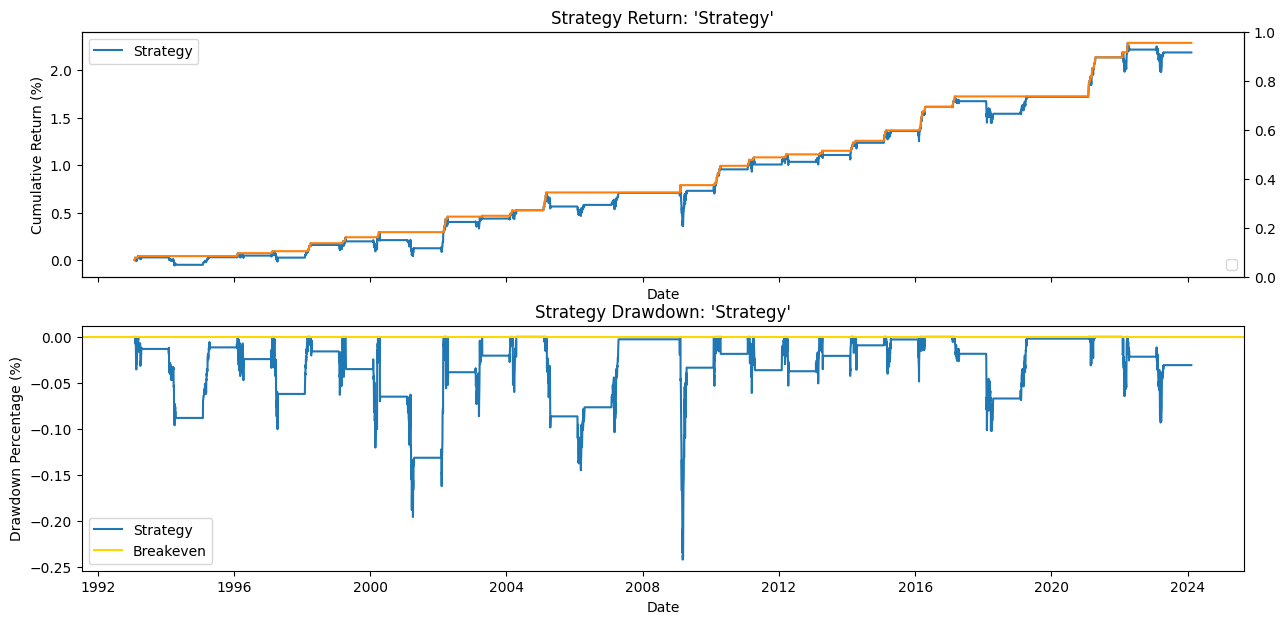

In [29]:
utils.plot(rets=sharpe_weighted_returns)

### Markowitz-Weighted

In [30]:
years = [year for year in range(all_returns.index[0].year, all_returns.index[-1].year)]

In [31]:
markowitz_weighted_positions = []

for i, year in enumerate(years):

    if i == 0:
        weights = all_positions.loc[all_positions.index.year == year].fillna(0.0).div(all_positions.loc[all_positions.index.year == year].sum(axis=1) + 1e-5, axis=0)
    else:
        positions_prev_years = all_positions.loc[all_positions.index.year < year]
        active_positions_prev_years = positions_prev_years.loc[positions_prev_years.sum(axis=1) != 0.0]
        active_tickers_prev_years = active_positions_prev_years.loc[:, active_positions_prev_years.sum(axis=0) != 0]
        strategy_returns_by_ticker_prev_years = all_returns.reindex(index=active_tickers_prev_years.index, columns=active_tickers_prev_years.columns)
        if strategy_returns_by_ticker_prev_years.shape[0] == 0:
            continue
        weights_by_ticker = utils.calculate_markowitz_weights(returns_df=strategy_returns_by_ticker_prev_years)

        positions_this_year = all_positions.loc[all_positions.index.year == year]
        active_positions_this_year = positions_this_year.loc[positions_this_year.sum(axis=1) != 0.0]

        weights = pd.DataFrame(weights_by_ticker, index=active_positions_this_year.index)
        weights = weights.reindex(index=positions_this_year.index, columns=positions_this_year.columns, fill_value=0.0)
    
    markowitz_weighted_positions.append(weights)

markowitz_weighted_positions = pd.concat(markowitz_weighted_positions, axis=0)
markowitz_weighted_positions = markowitz_weighted_positions.reindex(index=all_hodl_returns.index).ffill()
markowitz_weighted_positions_sum = markowitz_weighted_positions.sum(axis=1)
markowitz_weighted_positions.head(5)

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
Date,,,,,,,,,,,,
1993-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1993-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99999
1993-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99999
1993-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99999
1993-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99999


In [32]:
markowitz_weighted_returns = (all_hodl_returns * markowitz_weighted_positions).sum(axis=1)
markowitz_weighted_returns.head(5)

Date
1993-01-29    0.000000
1993-02-01    0.007113
1993-02-02    0.002118
1993-02-03    0.010571
1993-02-04    0.004184
dtype: float64

In [33]:
train_dates = utils.get_training(all_hodl_returns.mean(axis=1)).index.tolist()
valid_dates = utils.get_validation(all_hodl_returns.mean(axis=1)).index.tolist()
test_dates = utils.get_test(all_hodl_returns.mean(axis=1)).index.tolist()

if constants.SPLIT:
    markowitz_weighted_description = pd.concat([
        utils.describe_split(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe_split(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe_split(
            returns=markowitz_weighted_returns, pos=markowitz_weighted_positions_sum, daily=True, asset="Risk-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Daily)"),
        utils.describe_split(
            returns=utils.get_trade_return(returns=markowitz_weighted_returns, pos=markowitz_weighted_positions_sum), daily=False, asset="Equally-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)
else:
    markowitz_weighted_description = pd.concat([
        utils.describe(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe(
            returns=markowitz_weighted_returns, pos=markowitz_weighted_positions_sum, daily=True, asset="Risk-weighted",
        ).to_frame(name="Strategy (Daily)"),
        utils.describe(
            returns=utils.get_trade_return(returns=markowitz_weighted_returns, pos=markowitz_weighted_positions_sum), daily=False, asset="Equally-weighted"
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)

markowitz_weighted_description

,HODL,Market,Strategy (Daily),Strategy (Trade)
Asset,Equally-weighted,SPY,Risk-weighted,Equally-weighted
Start,1993-01-29,1993-01-29,1993-01-29,1993-02-01
End,2024-02-09,2024-02-09,2024-02-09,2023-02-01
Mean Return,0.03343%,0.05062%,0.08513%,4.28391%
Total Return,819.44%,"2,597.71%",218.75%,218.75%
Median Return,0.02287%,0.06694%,0.09642%,2.75891%
1st Quartile,-0.23802%,-0.41626%,-0.60905%,-1.59381%
3rd Quartile,0.35162%,0.58064%,0.83515%,9.29300%
Std Dev Return,0.78344%,1.05063%,1.31377%,6.67578%
CAGR,3.036 bps,4.510 bps,7.650 bps,407.830 bps


In [34]:
utils.get_statistic(stat_df=markowitz_weighted_description, stat="Mean Return")

,HODL,Market,Strategy (Daily),Strategy (Trade)
Mean Return,0.03343%,0.05062%,0.08513%,4.28391%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


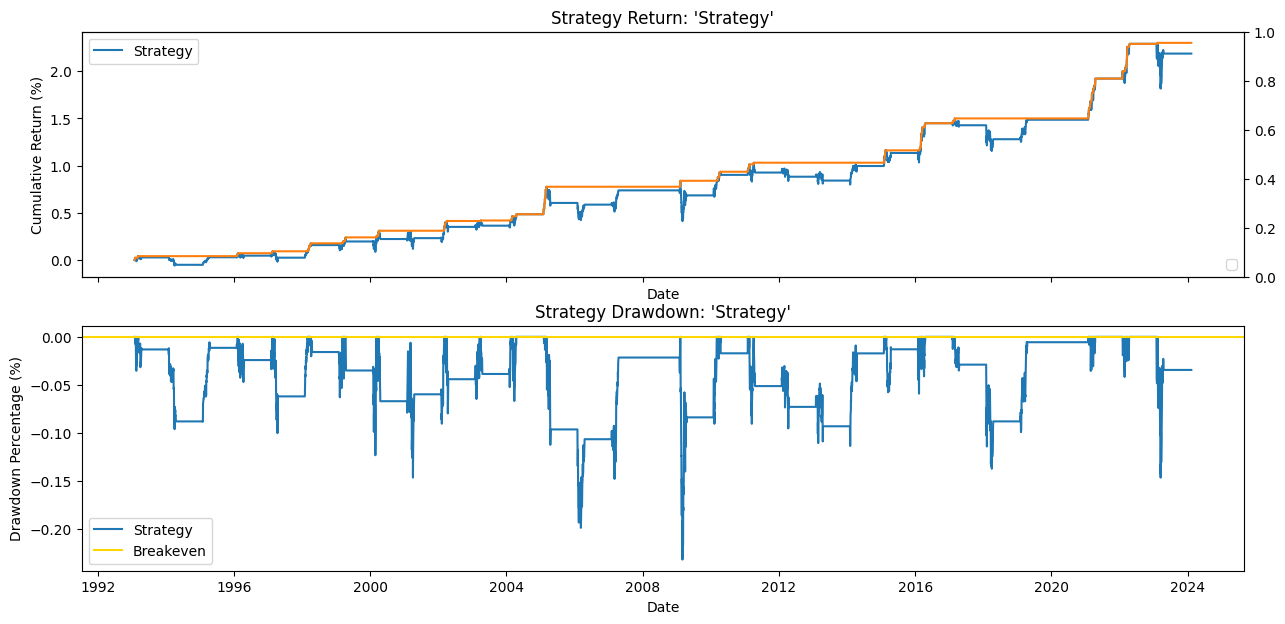

In [35]:
utils.plot(rets=markowitz_weighted_returns)

In [39]:
descriptions = utils.combine_descriptions(
    EW=equal_weighted_description, 
    Risk=risk_weighted_description, 
    Sharpe=sharpe_weighted_description,
    Markowitz=markowitz_weighted_description,
)
descriptions = pd.concat([all_stock_descriptions, descriptions], axis=0)
descriptions

HODL  Strategy (Daily)  \
Type      statistic                                                   
XLC       Asset                               XLC               XLC   
          Start                        2018-06-19        2018-06-19   
          End                          2024-02-09        2024-02-09   
          Mean Return                    0.03257%          0.10573%   
          Total Return                     31.18%            23.14%   
          Median Return                  0.06840%          0.10856%   
          1st Quartile                  -0.69773%         -0.77322%   
          3rd Quartile                   0.76880%          0.90700%   
          Std Dev Return                 1.36623%          1.40163%   
          CAGR                          2.324 bps         9.595 bps   
          Trade CAGR                          N/A            4.250%   
          Ann. CAGR                        6.031%           27.339%   
          Activity Ratio                  100.00%            18.58%   
          Number of Trades                    0.0               5.0   
          Average Hold Period       1,168.00 Days        43.40 Days   
          Daily Sharpe Ratio               0.0238            0.0754   
          Ann. Sharpe Ratio                0.3785            0.5161   
          Daily Sortino Ratio              0.0336            0.1114   
          Ann. Sortino Ratio               0.5331            0.7623   
          Daily Calmar Ratio               0.6684            1.3485   
          Hit Ratio                        52.74%            54.84%   
          MDD                             -46.65%           -17.16%   
          MDD Start                    2021-09-01        2022-02-02   
          MDD Bottom                   2022-11-03        2023-03-10   
          MDD End                            None              None   
          MDD Decline Duration           297 Days           79 Days   
          MDD Recovery Duration              None              None   
XLY       Asset                               XLY               XLY   
          Start                        1998-12-22        1998-12-22   
          End                          2024-02-09        2024-02-09   
          Mean Return                    0.04952%          0.08991%   
          Total Return                    983.05%           165.26%   
          Median Return                  0.09052%          0.12673%   
          1st Quartile                  -0.59381%         -0.55427%   
          3rd Quartile                   0.73150%          0.76633%   
          Std Dev Return                 1.30828%          1.36184%   
          CAGR                          4.096 bps         8.066 bps   
          Trade CAGR                          N/A            4.149%   
          Ann. CAGR                       10.870%           22.528%   
          Activity Ratio                  100.00%            20.80%   
          Number of Trades                    0.0              24.0   
          Average Hold Period       5,818.00 Days        50.42 Days   
          Daily Sharpe Ratio               0.0378             0.066   
          Ann. Sharpe Ratio                0.6008             0.478   
          Daily Sortino Ratio              0.0529            0.0936   
          Ann. Sortino Ratio               0.8391            0.6777   
          Daily Calmar Ratio              24.7809            5.9309   
          Hit Ratio                        53.08%            53.88%   
          MDD                             -39.67%           -27.86%   
          MDD Start                    2021-11-19        2000-04-11   
          MDD Bottom                   2022-12-28        2009-03-09   
          MDD End                            None        2009-04-16   
          MDD Decline Duration           278 Days          393 Days   
          MDD Recovery Duration              None           28 Days   
XLP       Asset                               XLP               XLP  

In [40]:
if constants.SPLIT:
    train_descriptions = descriptions.loc[descriptions.index.get_level_values("set") == "Train"]
    display(utils.get_statistic(stat_df=train_descriptions, stat="Mean Return").sort_values("Strategy (Daily)"))

    validation_descriptions = descriptions.loc[descriptions.index.get_level_values("set") == "Validation"]
    display(utils.get_statistic(stat_df=validation_descriptions, stat="Mean Return").sort_values("Strategy (Daily)"))
    
    test_descriptions = descriptions.loc[descriptions.index.get_level_values("set") == "Test"]
    display(utils.get_statistic(stat_df=test_descriptions, stat="Mean Return").sort_values("Strategy (Daily)"))

else:
    display(utils.get_statistic(stat_df=descriptions, stat="Mean Return").sort_values("Strategy (Daily)"))

,,HODL,Strategy (Daily),Strategy (Trade),Market
Type,statistic,,,,
XLK,Mean Return,0.05165%,0.03931%,1.91430%,NaN
XLV,Mean Return,0.04422%,0.04721%,2.24886%,NaN
XLU,Mean Return,0.03865%,0.05143%,2.50591%,NaN
XLP,Mean Return,0.03250%,0.05310%,2.60039%,NaN
SPY,Mean Return,0.05062%,0.05694%,2.78985%,NaN
Risk,Mean Return,0.03343%,0.06442%,3.27530%,0.05062%
EW,Mean Return,0.03343%,0.06800%,3.37710%,0.05062%
XLF,Mean Return,0.04704%,0.07419%,3.24521%,NaN
XLRE,Mean Return,0.03567%,0.07599%,3.54128%,NaN


## Random Strategy Comparisons

In [41]:
# df_ret = strategy_details["SPY"]["hodl"]

In [42]:
# def create_random_strategy(returns: pd.Series, activity: float = 1.0):

#     rand = pd.Series(np.random.uniform(0, 1, len(returns)), index=returns.index)
#     rand_pos = (rand <= activity).astype(int)

#     rand_strat_returns = returns * rand

#     return {"returns": rand_strat_returns, "pos": rand_pos}
    

In [43]:
# pd.concat([describe(**create_random_strategy(returns=df_ret, activity=0.1309)) for _ in range(10)], axis=1)

In [44]:
# pd.concat([describe(returns=get_trade_return(**create_random_strategy(returns=df_ret, activity=0.1309))) for _ in range(10)], axis=1)